In [5]:
import pandas as pd 

#creating a DataFrame

data = { "coloumn1" : [1,2,None,4,5],
         "coloumn2" : ["A","B",None,"D","E"],
         "coloumn3" : ["X","Y","Z",None,"W"] }

df = pd.DataFrame(data)

#checking for missing vvalues:
missing_values = df.isnull()
missing_values

# Counting missing values in each coloumns
missing_values_counts = df.isnull().sum()
missing_values_counts

#check if aany missing values in Dataframe

check_missing_values = df.isnull().values.any()
check_missing_values

True

# Removing rows or coloumns with missing values using dropna()

In [7]:
# droping rows with any misssing values: 
drop_rows = df.dropna()
drop_rows

# Dropiing coloumns with any missing values
drop_coloumns = df.dropna(axis=1)
drop_coloumns

""
0
1
2
3
4


In [8]:
# droping rows with missing values in specific coloumns

df1 = df.dropna(subset = ["coloumn1","coloumn2"])
df1

,coloumn1,coloumn2,coloumn3
0,1.0,A,X
1,2.0,B,Y
3,4.0,D,None
4,5.0,E,W


# Filing missing values using fillna(), mean, median and forward/backward filing: 

In [10]:
df

,coloumn1,coloumn2,coloumn3
0,1.0,A,X
1,2.0,B,Y
2,NaN,None,Z
3,4.0,D,None
4,5.0,E,W


In [11]:
# filing missing values with mean of each coloumn 
df1 = df.fillna(df.mean(numeric_only=True))
df1

#filing missing values with median of each coloumn 
df2 = df.fillna(df.median(numeric_only=True))
df2

,coloumn1,coloumn2,coloumn3
0,1.0,A,X
1,2.0,B,Y
2,3.0,None,Z
3,4.0,D,None
4,5.0,E,W


In [12]:
#filing missing values using forward filing (propogating last valid observation forward)
df3 = df.fillna(method="ffill")
df3

C:\Users\siddh\AppData\Local\Temp\ipykernel_19768\93166691.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df3 = df.fillna(method="ffill")


,coloumn1,coloumn2,coloumn3
0,1.0,A,X
1,2.0,B,Y
2,2.0,B,Z
3,4.0,D,Z
4,5.0,E,W


In [13]:
#filing missing values using backward filing (propogating last valid observation backward)
df4 = df.fillna(method = "bfill")
df4

C:\Users\siddh\AppData\Local\Temp\ipykernel_19768\198954516.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df4 = df.fillna(method = "bfill")


,coloumn1,coloumn2,coloumn3
0,1.0,A,X
1,2.0,B,Y
2,4.0,D,Z
3,4.0,D,W
4,5.0,E,W


# Standardizing data formats using string manipulation str.lower(),str.upper(),str.replace()

In [15]:
#creating a DataFrame : 
data = { "coloumn1" : ["value1","value2","old_string","value4"]}
df6 = pd.DataFrame(data)
df6

,coloumn1
0,value1
1,value2
2,old_string
3,value4


In [16]:
#converting coloumn values to lower
df6["coloumn1"] = df6["coloumn1"].str.lower()
df6
##converting coloumn values to upper
df6["coloumn1"] = df6["coloumn1"].str.upper()
df6

,coloumn1
0,VALUE1
1,VALUE2
2,OLD_STRING
3,VALUE4


In [17]:
# replace() : 
df6["coloumn1"] = df6["coloumn1"].str.replace("new_string","old_string")
df6

,coloumn1
0,VALUE1
1,VALUE2
2,OLD_STRING
3,VALUE4


In [18]:
df6["coloumn1"] = df6["coloumn1"].replace({"VALUE1": "a", "VALUE2": "b"})
df6


,coloumn1
0,a
1,b
2,OLD_STRING
3,VALUE4


# Converting data type using astype():

In [20]:
# converting coloumns to interger type 
df['coloumn1'] = df["coloumn1"].astype(int)

# converting coloumns to float type 
df['coloumn1'] = df["coloumn1"].astype(float)

# converting coloumns to string type 
df['coloumn1'] = df["coloumn1"].astype(str)

# converting coloumns to interger type 
df['coloumn1'] = pd.to_datetime(df['coloumn1'])

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

#  detecting outliers using z-scores and IQR: 

In [ ]:
# creating a sample dataframe: 

data = { 'coloumn_name' : [10,15,20,25,7,300000]}
df= pd.DataFrame(data)
df

# Zscores 

In [ ]:
#calculating z-scores for the colouumn: 
#Zscores = z= (x−μ)/σ
#zscores does not work well with NUMERICAL OUTLIERS
z_scores = (df['coloumn_name'] - df['coloumn_name'].mean())/df['coloumn_name'].std()
z_scores

In [ ]:
#defining a threshold for outliers detection (eg, z-scores > 3 or < -3)
#by defaut it is 3
threshold = 3


In [ ]:
# identifying outliers based on threshold:
outliers = df[abs(z_scores) > threshold]
outliers

In [ ]:
#checking if outliers DataFrame is Empty
if outliers.empty:
    print("NO outliers")
else :
    print("outliers")

# Inter Quartile Range

In [ ]:
data = { 'coloumn_name' : [10,15,12,8,20,25,7,300000]}
df= pd.DataFrame(data)
df

In [ ]:
#calculating the first quartile(q1):

Q1 = df['coloumn_name'].quantile(0.25)
Q1

In [ ]:
#calculating the third quartile(q3):
Q3 = df['coloumn_name'].quantile(0.75)
Q3

In [ ]:
#calculating inter quartie range (IQR) : 
IQR = Q3 - Q1
IQR

In [ ]:
# defining Threshold for outlires 
# ( eg values outside the range [(q1 - 1.5*IQR) + (q3 + 1.5*IQR] are considered outliers ) 

lower_threshold = Q1 - 1.5*IQR
upper_threshold = Q3 + 1.5*IQR


In [ ]:
# identifying the outliers based on threshold
outliers = df[(df['coloumn_name'] < lower_threshold) | (df['coloumn_name'] > upper_threshold)]
outliers

In [ ]:
if outliers.empty:
    print("NO outliers")
else :
    print("outliers:",outliers)

# JOINS

In [ ]:
df_people = pd.DataFrame({
    "ID": [1, 2, 3, 4],
    "Name": ["Alice", "Bob", "Charlie","emily"]
})

# DataFrame 2: Cities
df_cities = pd.DataFrame({
    "ID": [2, 3, 5, 6],
    "City": ["New York", "Bengaluru", "London","paris"]
})

In [ ]:
# inner join : RETURNS INTERSECTION OF TWO DATASETS
inner_join = pd.merge(df_people,df_cities, on="ID", how="inner")
inner_join


In [ ]:
# leftt join: Returns all records from the left dataset and matching records from right dataset:

left_join = pd.merge(df_people,df_cities, on="ID", how="left")
left_join

In [ ]:
# right join: Returns all records from the right dataset and matching records from left dataset:

right_join = pd.merge(df_people,df_cities, on="ID", how="right")
right_join

In [ ]:
# Outer Join : returns all records where there is a match in either the left or right dataset:
outer_join = pd.merge(df_people,df_cities, on="ID", how="outer")
outer_join


# Data Filtering 
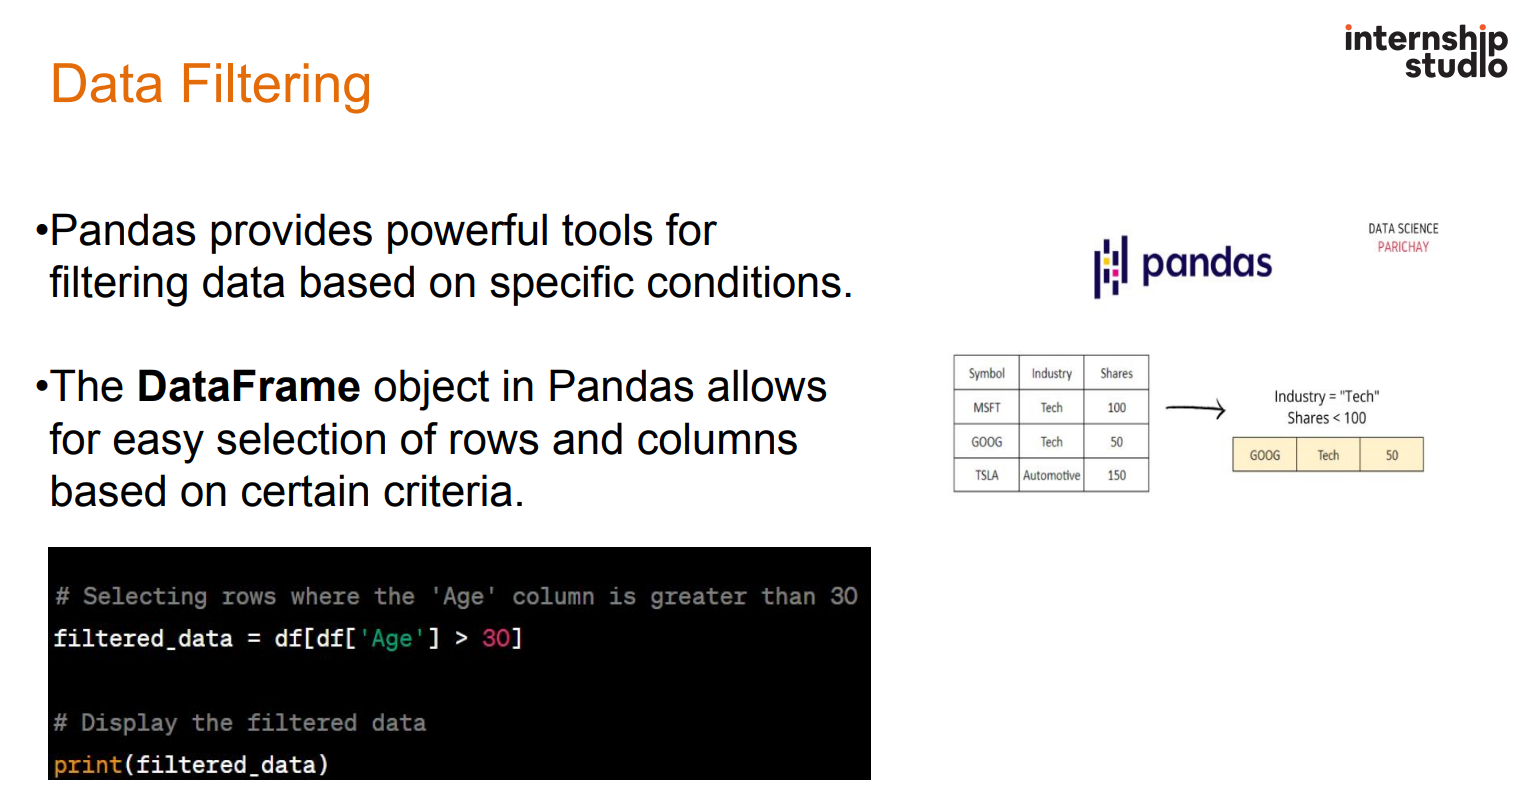
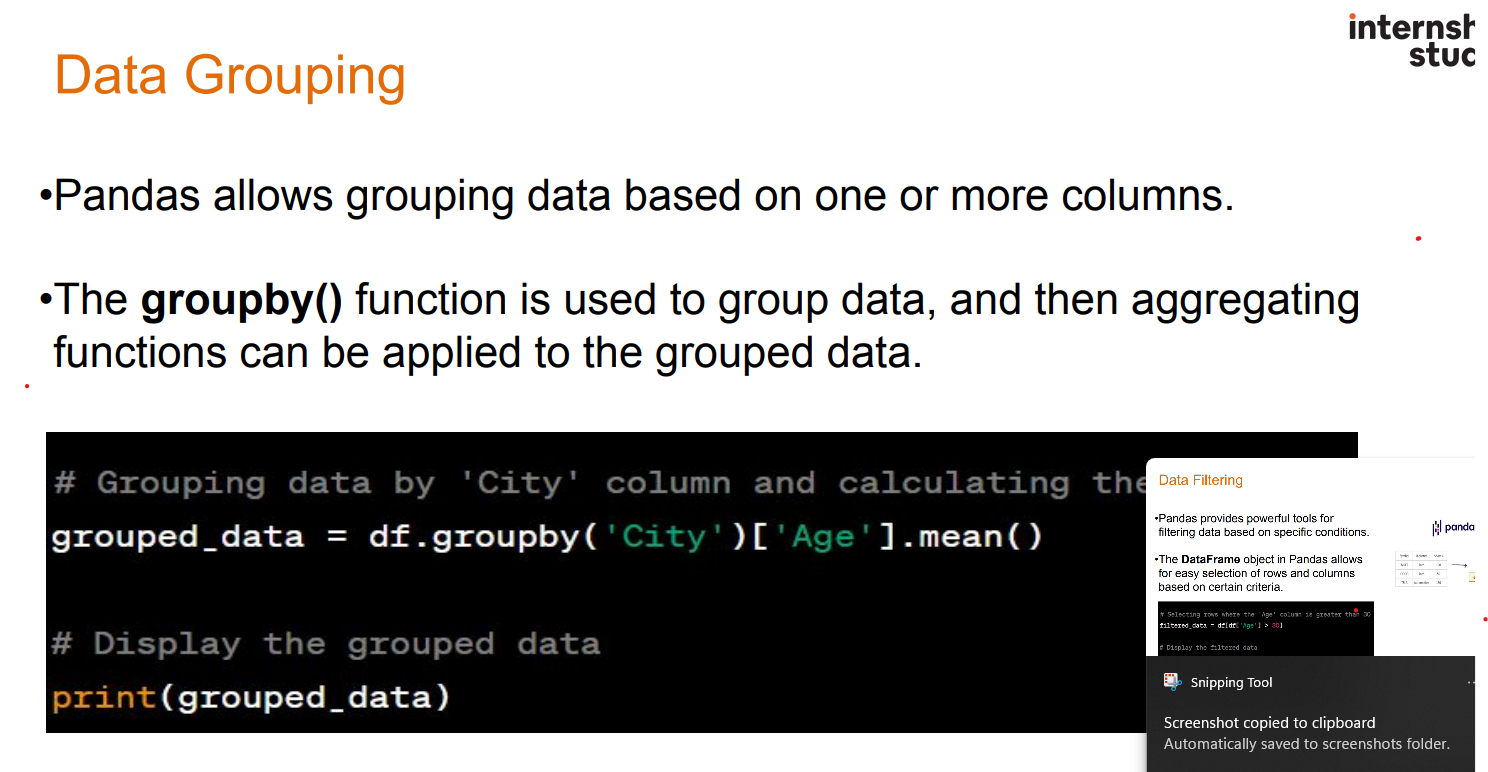
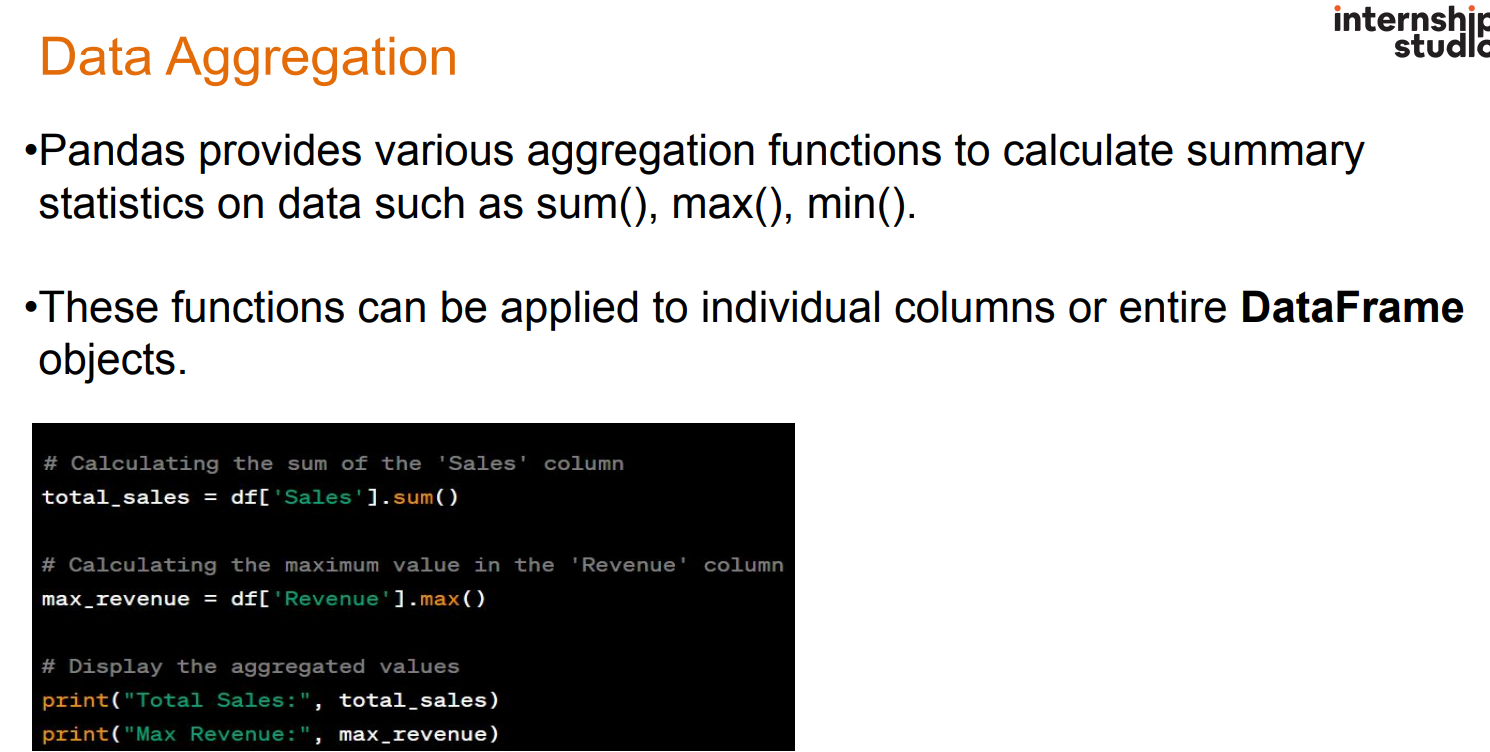
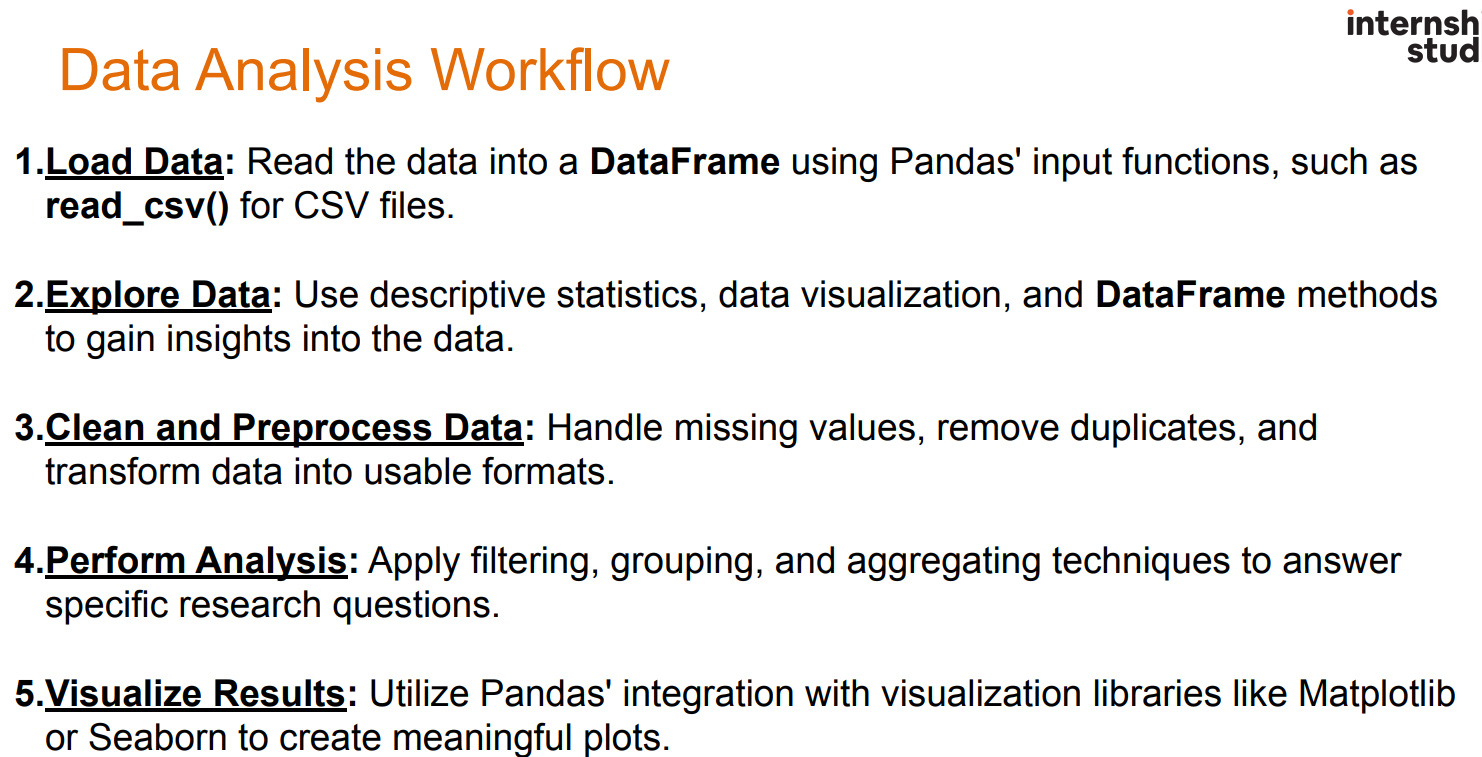